In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# Set previous variables 
t_max = 150e-3   # second       # total amount of x points or potential 
dt = 1e-3        # second       # 
tau = 20e-3      # second       # Membrane Time Constant
el = -60e-3      # milivolt     # Leak Potential 
vr = -70e-3      # milivolt     # Reset Voltage
vth = -50e-3     # milivolt     # Firing Threshold
r = 100e6        # ohm          # Membrane Resisitance
i_mean = 25e-11  # ampere       # Mean Current Input


### Coding Exercise 1: Plotting a histogram

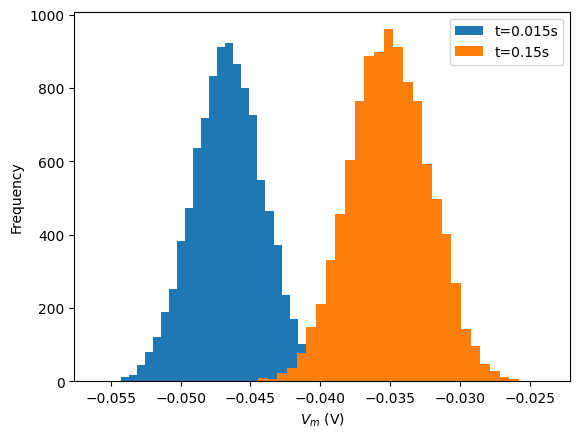

In [113]:
# Set a random number generator
np.random.seed(2020)

# Initialize t_range, step_end, n, v_n, i, and nbins
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n,step_end])
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random([n, step_end]) -1 ))
nbins = 32


# Loop over time steps
for step, t in enumerate(t_range):

    # Skip first iteration
    if step==0:
        continue

    # Compute v_n
    v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r * i[:, step])


# Initialize the figure
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')



# Plot a histogram at t_max/10 (add labels and parameters histtype = 'stepfilled' and linewidth=0)
plt.hist(v_n[:, int(step_end/10)], nbins, histtype='stepfilled', linewidth=0, label='t='+str(t_max/10) + 's')

# Plot a histogram at t_max (add labels and parameters  histtype = 'stepfilled' and linewidth=0)
plt.hist(v_n[:, int(step_end-1)], nbins, histtype='stepfilled', linewidth=0, label='t=' + str(t_max) + 's')

# Add legend
plt.legend()
plt.show()

### Coding Exercise 2: Adding spiking to the LIF neuron

In [202]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n, and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random([n,step_end])-1))

# Initialzie spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

# Loop over time steps
for step, t in enumerate(t_range):

    # Skip first iteration
    if step==0:
        continue

    # Compute v_n
    v_n[:, step] = v_n[:, step_end - 1] + (dt / tau) * (el - v_n[:, step - 1]) 

# Loop over simulations
    for j in range(n):

        # Check if voltage is above threshold
        if v_n[j,step] >= vth:

            # Reset to reset voltage
            v_n[j,step] = 100
         
            # Add this spike time
            spikes[j] += 10

            # Add spike cout to this step
            spikes_n[step] += 10


-0.06
-0.05
